<a href="https://colab.research.google.com/github/parth1614/QuantumComputing-Qiskit/blob/main/DJ_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector

     |████████████████████████████████| 6.5 MB 4.1 MB/s 
     |████████████████████████████████| 18.0 MB 42.1 MB/s 
     |████████████████████████████████| 240 kB 51.1 MB/s 
     |████████████████████████████████| 200 kB 53.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 65.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.0 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 943 kB 43.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 47.8 MB/s 
     |████████████████████████████████| 112 kB 42.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.1-py3-none-any.whl size=11887 sha256=d0a6d0dd82886993426ce16fc853c6124f1e0bc0ac45c7e14c5924b3222dbf98
  Stored in directory: /root/.cache/pip/whe

In [2]:
from qiskit.visualization import plot_bloch_multivector
#from matplotlib import style
import math
import numpy as np

In [3]:
qasm_sim = Aer.get_backend('qasm_simulator')
##statevec_sim = Aer.get_backend('statevector_simulator')

In [5]:
##setting the length of input string
n = 3 

In [6]:
constant_black_box = QuantumCircuit(n+1)
output = np.random.randint(2) ##generating random integer
if output == 1:
  constant_black_box.x(n)

constant_black_box.draw()


q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [8]:
balanced_black_box = QuantumCircuit(n+1)
balanced_string = "101"

for qubit in range(len(balanced_string)):
  if balanced_string[qubit] == '1':
    balanced_black_box.x(qubit)

balanced_black_box.barrier()

for qubits in range(n):
  balanced_black_box.cx(qubit,n)

balanced_black_box.barrier()

for qubits in range(len(balanced_string)):
  if balanced_string[qubit] == '1':
    balanced_black_box.x(qubit)

balanced_black_box.draw()

┌───┐ ░                 ░                
q_0: ┤ X ├─░─────────────────░────────────────
     └───┘ ░                 ░                
q_1: ──────░─────────────────░────────────────
     ┌───┐ ░                 ░ ┌───┐┌───┐┌───┐
q_2: ┤ X ├─░───■────■────■───░─┤ X ├┤ X ├┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘└───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░────────────────
           ░ └───┘└───┘└───┘ ░

In [9]:
deu = QuantumCircuit((n+1),n)

for qubit in range(n):
  deu.h(qubit)

deu.x(n)
deu.h(n)
deu.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [21]:
deu += balanced_black_box
deu.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  """Entry point for launching an IPython kernel.


┌───┐┌───┐ ░                 ░                 ░ ┌─┐                     »
q_0: ┤ H ├┤ X ├─░─────────────────░─────────────────░─┤M├─────────────────────»
     ├───┤└───┘ ░                 ░                 ░ └╥┘┌─┐                  »
q_1: ┤ H ├──────░─────────────────░─────────────────░──╫─┤M├──────────────────»
     ├───┤┌───┐ ░                 ░ ┌───┐┌───┐┌───┐ ░  ║ └╥┘┌─┐               »
q_2: ┤ H ├┤ X ├─░───■────■────■───░─┤ X ├┤ X ├┤ X ├─░──╫──╫─┤M├───────────────»
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ├───┤├───┤├───┤ ░  ║  ║ └╥┘┌───┐┌───┐┌───┐»
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░─┤ H ├┤ H ├┤ H ├─░──╫──╫──╫─┤ H ├┤ H ├┤ H ├»
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░  ║  ║  ║ └───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════╩══╩══╩════════════════»
                                                       0  1  2                »
«      ░ ┌─┐┌───┐         ░                 ░                
«q_0: ─░─┤M├┤ X ├─────────░─────────────────░────────────────
«      ░ └╥┘└┬─┬┘         ░                 ░                
«q_1: ─░──╫──┤M├──────────░─────────────────░────────────────
«      ░  ║  └╥┘ ┌─┐┌───┐ ░                 ░ ┌───┐┌───┐┌───┐
«q_2: ─░──╫───╫──┤M├┤ X ├─░───■────■────■───░─┤ X ├┤ X ├┤ X ├
«      ░  ║   ║  └╥┘└───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘└───┘
«q_3: ─░──╫───╫───╫───────░─┤ X ├┤ X ├┤ X ├─░────────────────
«      ░  ║   ║   ║       ░ └───┘└───┘└───┘ ░                
«c: 3/════╩═══╩═══╩══════════════════════════════════════════
«         0   1   2

In [22]:
## Adding constant black box in dj circuit

# deu += constant_black_box
# deu.draw()


In [23]:
for qubit in range(n):
  deu.h(n)
deu.barrier()

for i in range(n):
  deu.measure(i,i)

deu.draw()

┌───┐┌───┐ ░                 ░                 ░ ┌─┐                     »
q_0: ┤ H ├┤ X ├─░─────────────────░─────────────────░─┤M├─────────────────────»
     ├───┤└───┘ ░                 ░                 ░ └╥┘┌─┐                  »
q_1: ┤ H ├──────░─────────────────░─────────────────░──╫─┤M├──────────────────»
     ├───┤┌───┐ ░                 ░ ┌───┐┌───┐┌───┐ ░  ║ └╥┘┌─┐               »
q_2: ┤ H ├┤ X ├─░───■────■────■───░─┤ X ├┤ X ├┤ X ├─░──╫──╫─┤M├───────────────»
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ├───┤├───┤├───┤ ░  ║  ║ └╥┘┌───┐┌───┐┌───┐»
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░─┤ H ├┤ H ├┤ H ├─░──╫──╫──╫─┤ H ├┤ H ├┤ H ├»
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░  ║  ║  ║ └───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════╩══╩══╩════════════════»
                                                       0  1  2                »
«      ░ ┌─┐┌───┐         ░                 ░                 ░ ┌─┐      
«q_0: ─░─┤M├┤ X ├─────────░─────────────────░─────────────────░─┤M├──────
«      ░ └╥┘└┬─┬┘         ░                 ░                 ░ └╥┘┌─┐   
«q_1: ─░──╫──┤M├──────────░─────────────────░─────────────────░──╫─┤M├───
«      ░  ║  └╥┘ ┌─┐┌───┐ ░                 ░ ┌───┐┌───┐┌───┐ ░  ║ └╥┘┌─┐
«q_2: ─░──╫───╫──┤M├┤ X ├─░───■────■────■───░─┤ X ├┤ X ├┤ X ├─░──╫──╫─┤M├
«      ░  ║   ║  └╥┘└───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ├───┤├───┤├───┤ ░  ║  ║ └╥┘
«q_3: ─░──╫───╫───╫───────░─┤ X ├┤ X ├┤ X ├─░─┤ H ├┤ H ├┤ H ├─░──╫──╫──╫─
«      ░  ║   ║   ║       ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░  ║  ║  ║ 
«c: 3/════╩═══╩═══╩══════════════════════════════════════════════╩══╩══╩═
«         0   1   2                                              0  1  2

In [24]:
from qiskit import execute

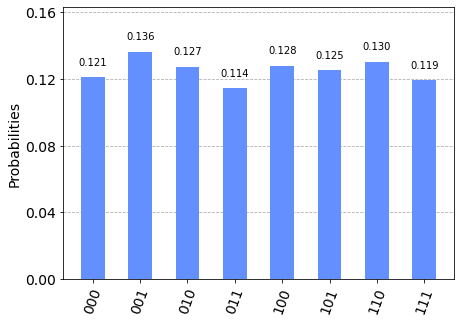

In [25]:
shots = 1024
results = execute(deu,backend = qasm_sim,shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)